In [3]:
import pandas as pd
import numpy as np

In [4]:
path1 = "Comments.csv.gz"
path2 = "Posts.csv.gz"
path3 = "Users.csv.gz"
df_comm = pd.read_csv(path1)
df_post = pd.read_csv(path2)
df_user = pd.read_csv(path3)

# Zadanie 1

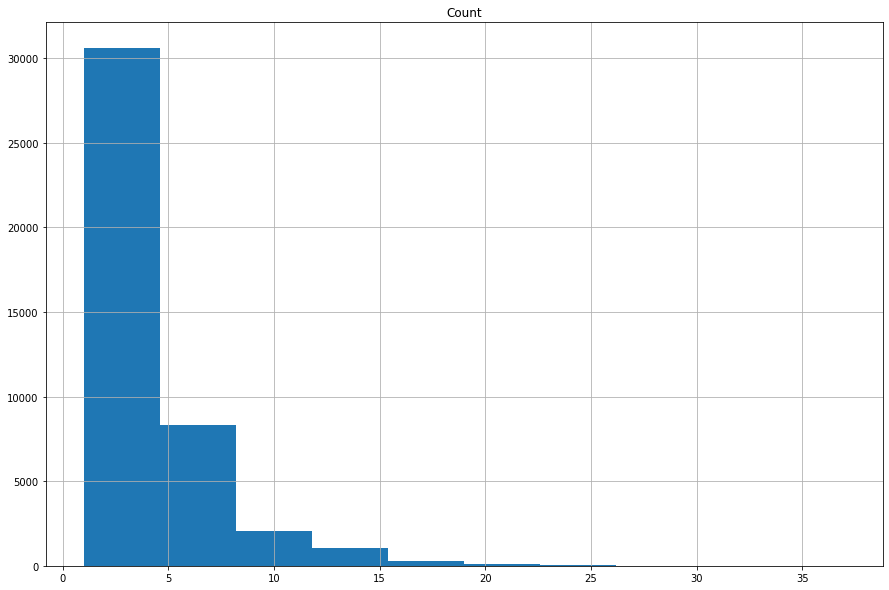

In [7]:
# zliczamy liczbę komentarzy pod danym postem
liczba=df_comm.groupby('PostId')\
            .count()\
            .reset_index()\
            .drop(['CreationDate', 'Score', 'UserId'], axis=1)\
            .rename(columns={'Id': 'Count'})
# rysujemy histogram, przypisujemy do zmiennej by wyświetlił się sam histogram, bez zbędnych napisów 
a=liczba.hist('Count', figsize = (15,10))

# Zadanie 2

In [5]:
# sumujemy wyświetlenie dla każdego z użytkowników
wyswietlenia = df_post.groupby('OwnerUserId')\
                .sum()\
                .merge(df_user[['AccountId', 'DisplayName']], left_on='OwnerUserId', right_on='AccountId')\
                .sort_values('ViewCount', ascending=False)
# wybieramy nick użytkownika z największą sumą wyświetleń
wyswietlenia['DisplayName'].values[0]

'hitec'

# Zadanie 3

In [6]:
# wybieramy odpowiedzi ze wszystkich postów
odpowiedzi = df_post[df_post['PostTypeId']==2][['OwnerUserId', 'Id']]
# wybieramy zaakceptowane odpowiedzi
zaakceptowane = odpowiedzi.merge(df_post[['AcceptedAnswerId']], left_on='Id', right_on='AcceptedAnswerId')\
                        .groupby('OwnerUserId')\
                        .count()\
                        .reset_index()\
                        .drop('AcceptedAnswerId', axis=1)\
                        .rename(columns={'Id': 'Count'})
# dodajemy do Id użytkowników nicki
uzyt_akc = zaakceptowane.merge(df_user[['DisplayName', 'Id']], left_on='OwnerUserId', right_on='Id')\
                        .drop('Id', axis=1)\
                        .sort_values(by='Count', ascending=False)
# wybieramy nick użytkownika z drugą największą liczbą zaakceptowanych odpowiedzi
uzyt_akc['DisplayName'].values[1]

'jpatokal'

# Zadanie 4

In [5]:
#wybieramy odpowiedzi ze wszystkich postów
odpowiedzi = df_post[df_post['PostTypeId']==2][['OwnerUserId', 'Id', 'Score', 'ParentId']]
# wybieramy odpowiedzi, które zostały zaakceptowane
zaakceptowane = odpowiedzi.merge(df_post[['AcceptedAnswerId']], left_on='Id', right_on='AcceptedAnswerId')
# łączymy zaakceptowane odpowiedzi z innymi odpowiedziami pod danym zapytaniem
akc = zaakceptowane.merge(odpowiedzi, left_on='ParentId', right_on='ParentId', suffixes=('_acc', ''))
#wybieramy pytania ze wszystkich postów
pytania = df_post[df_post['PostTypeId']==1]
#liczba zapytań, u których wynik zaakceptowanej odpowiedzi jest mniejszy niż wynik innej odpowiedzi/liczba wszystkich zapytań
akc[akc['Score_acc']<akc['Score']]['ParentId'].unique().shape[0]/pytania.shape[0]*100 

4.099266156395486